## CONFIGURACIÓN INICIAL

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Bigramas

In [ ]:
mb_bigrams = list(bigrams(text1))
fdist = FreqDist(mb_bigrams)
fdist.most_common(50)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557),
 ((',', 'as'), 523),
 ((',', 'I'), 461),
 ((',', 'he'), 446),
 (('from', 'the'), 428),
 ((',', 'in'), 402),
 (('of', 'his'), 371),
 (('the', 'whale'), 369),
 (('.', 'The'), 369),
 (('and', 'the'), 357),
 ((';', 'but'), 340),
 ((',', 'but'), 339),
 (('of', 'a'), 327),
 (('on', 'the'), 326),
 (('to', 'be'), 320),
 (('at', 'the'), 316),
 (('with', 'the'), 308),
 (('by', 'the'), 301),
 (('for', 'the'), 285),
 (("'", 't'), 277),
 (('.', 'And'), 261),
 ((',', 'with'), 260),
 (('.', 'I'), 260),
 ((',', 'or'), 257),
 (('in', 'his'), 253),
 (('."', '"'), 246),
 (('into', 'the'), 246),
 (('in', 'a'), 240),
 ((',', 'when'), 238),
 (('.', 'It'), 238),
 ((',', 'it'), 238),
 (('the', 'ship'), 235),
 (('it', ','), 234),
 (('with', 'a'), 233),
 (('him', ','), 232),
 ((';', 'the'), 

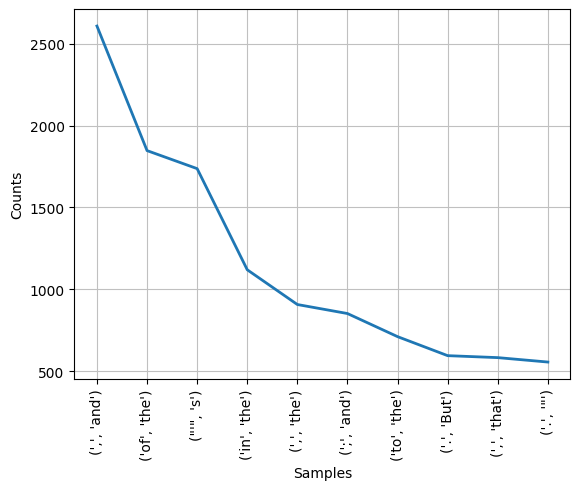

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

## Filtrado de bi-gramas
* A pesar de la buena visualización del plot, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interés.
* Aplicar algún tipo de filtro sería de gran ayuda para ver estructuras más relevantes.

In [ ]:
threshold = 2
filtered_bigrams = [bigram for bigram in mb_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.most_common(10)

[(('from', 'the'), 428),
 (('the', 'whale'), 369),
 (('and', 'the'), 357),
 (('with', 'the'), 308),
 (('for', 'the'), 285),
 (('into', 'the'), 246),
 (('the', 'ship'), 235),
 (('the', 'sea'), 223),
 (('upon', 'the'), 216),
 (('that', 'the'), 215)]

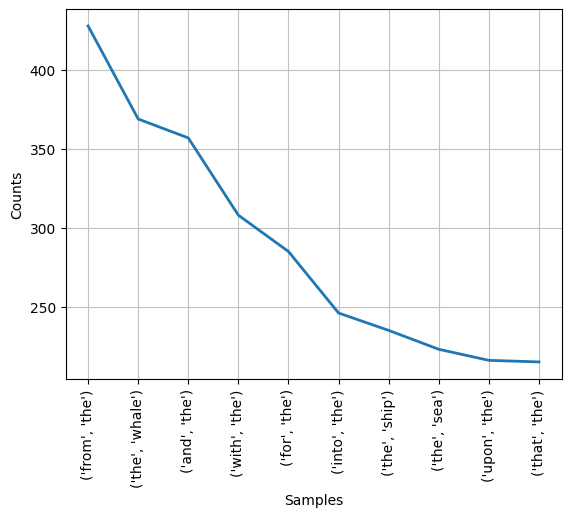

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
filtered_dist.plot(10)

## Ahora vamos a probar con Tri-gramas

In [ ]:
from nltk.util import ngrams

md_trigrams = list(ngrams(text1, 3))
md_trigrams[:10]
fdist_trigrams = FreqDist(md_trigrams)
fdist_trigrams.most_common(10)


[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

In [ ]:
threshold_trigram = 2
md_trigrams_filtered = [trigram for trigram in md_trigrams if len(trigram[0]) > threshold_trigram and len(trigram[1]) > threshold_trigram and len(trigram[2]) > threshold_trigram]
fdist_trigrams_filtered = FreqDist(md_trigrams_filtered)
fdist_trigrams_filtered.most_common(10)

[(('the', 'Sperm', 'Whale'), 77),
 (('the', 'White', 'Whale'), 63),
 (('the', 'old', 'man'), 32),
 (('the', 'sperm', 'whale'), 30),
 (('the', 'Right', 'Whale'), 25),
 (('the', 'same', 'time'), 24),
 (('for', 'the', 'time'), 24),
 (('must', 'have', 'been'), 23),
 (('into', 'the', 'sea'), 21),
 (('now', 'and', 'then'), 20)]

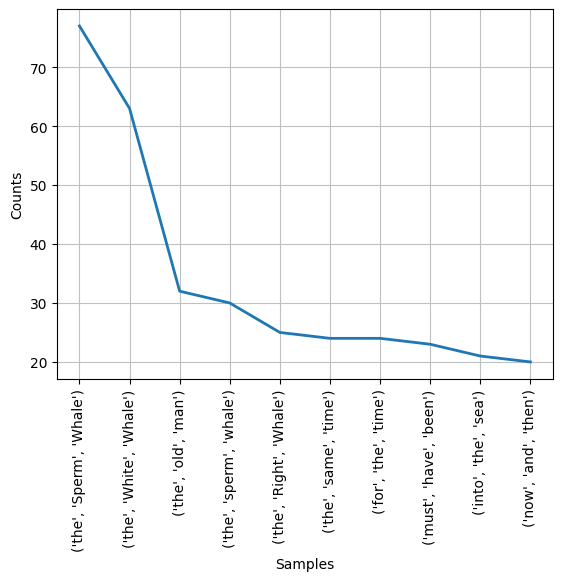

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist_trigrams_filtered.plot(10)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
c_stopwords = stop_words + [i.upper() for i in stop_words]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]